In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('uvvisml/data/processed/absPeak_absBand_absMol_emiPeak_emiBand_quantumYield_logLife.csv')
df.count()

smiles                 699
solvent                699
abs_peakwavs_max       699
abs_bandwidth          699
abs_molar_ext_coeff    699
emi_peakwavs_max       699
emi_bandwidth          699
quantum_yield          699
log_lifetime           699
source                 699
dtype: int64

In [3]:
df2 = pd.read_csv('uvvisml/data/original/joung/DB_for_chromophore_Sci_Data_rev02.csv')
df2.count()

Tag                           20236
Chromophore                   20236
Solvent                       20236
Absorption max (nm)           17295
Emission max (nm)             18142
Lifetime (ns)                  6960
Quantum yield                 13837
log(e/mol-1 dm3 cm-1)          8041
abs FWHM (cm-1)                 747
emi FWHM (cm-1)                 627
abs FWHM (nm)                  3592
emi FWHM (nm)                  7198
Molecular weight (g mol-1)    20236
Reference                     20236
dtype: int64

In [83]:
def make_plot(preds_file, true_file, col_name, title, units, img_name):
    preds_df = pd.read_csv(preds_file)
    true_df = pd.read_csv(true_file)

    true_value = true_df[col_name]
    pred_value = preds_df[col_name]

    plt.figure(figsize=(5,5))
    plt.scatter(true_value, pred_value)
    plt.title(title, fontsize=15)
    if units != '':
        plt.xlabel('true values (' + units + ')', fontsize=12)
        plt.ylabel('predictions (' + units + ')', fontsize=12)
    else:
        plt.xlabel('true values', fontsize=12)
        plt.ylabel('predictions', fontsize=12)
    plt.axis('equal')
    metrics = calculate_metrics(true_value, pred_value)
#     plt.text(0, 1.25, metrics, verticalalignment='top')
#     plt.text(0, -0.1, metrics, ha = 'left', verticalalignment='top')
    plt.figtext(0.1, 0.0, metrics)
    file_path = 'prediction_plots_images/' + img_name
    plt.savefig(file_path)
#     plt.show()

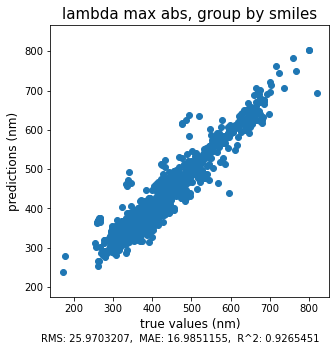

In [84]:
#testing

preds_file = 'uvvisml/models/lambda_max_abs_checkpoints/group_by_smiles/lambda_max_abs_preds.csv'
true_file = 'uvvisml/data/splits/lambda_max_abs/deep4chem/group_by_smiles/smiles_target_test.csv'
col_name = 'peakwavs_max'
title = 'lambda max abs, group by smiles'
units = 'nm'
img_name = 'peakwavs_max__group_by_smiles__alone.png'

make_plot(preds_file, true_file, col_name, title, units, img_name)

In [4]:
def calculate_metrics(true_value, predicted_value):
    rms = round(mean_squared_error(true_value, predicted_value, squared=False), 7)
    mae = round(mean_absolute_error(true_value, predicted_value), 7)
    r2 = round(r2_score(true_value, predicted_value), 7)
    
    result = 'RMS: ' + str(rms) + ',  MAE: ' + str(mae) + ',  $R^2$: ' + str(r2)
    return result

In [69]:
opt_properties = ['lambda_max_abs', 'lambda_max_emi', 'both_peaks', 'abs_all', 'emi_all', 'multitask_peak_stats', 'multitask_all', 'quantum_yield', 'log_lifetime']
split_types = ['group_by_smiles', 'random', 'scaffold']

prop_to_col_name = {'lambda_max_abs': 'peakwavs_max',
                   'lambda_max_emi': 'emi_peakwavs_max',
                   'both_peaks': ['abs_peakwavs_max', 'emi_peakwavs_max'],
                    'abs_all': ['abs_peakwavs_max', 'abs_bandwidth', 'abs_molar_ext_coeff'],
                    'emi_all': ['emi_peakwavs_max', 'emi_bandwidth'],
                    'multitask_peak_stats': ['abs_peakwavs_max', 'abs_bandwidth', 'abs_molar_ext_coeff', 'emi_peakwavs_max', 'emi_bandwidth'],
                   'multitask_all': ['abs_peakwavs_max', 'abs_bandwidth', 'abs_molar_ext_coeff', 'emi_peakwavs_max', 'emi_bandwidth', 'quantum_yield', 'log_lifetime'],
                    'quantum_yield': 'quantum_yield',
                    'log_lifetime': 'log_lifetime'}

col_units = {'peakwavs_max': 'nm',
           'emi_peakwavs_max': 'nm',
           'abs_peakwavs_max': 'nm',
            'abs_bandwidth': 'nm',
             'abs_molar_ext_coeff': '$mol^{-1}$ $dm^3$ $cm^{-1}$',
            'emi_bandwidth': 'nm',
            'quantum_yield': '',
            'log_lifetime': 'ns'}

my_order = {'lambda_max_abs':'1', 'lambda_max_emi':'1', 'both_peaks':'2', 'abs_all':'3', 'emi_all':'3', 'multitask_peak_stats':'4', 'multitask_all':'5', 'quantum_yield':'1', 'log_lifetime':'1'}

/tmp/ipykernel_1121077/4198858895.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,5))


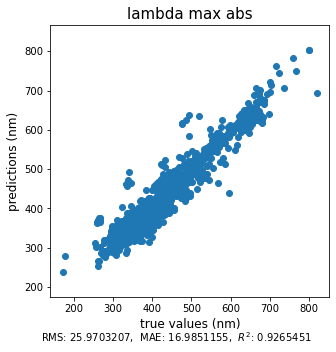

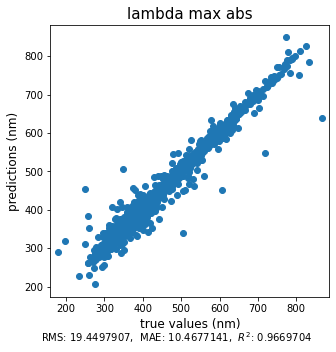

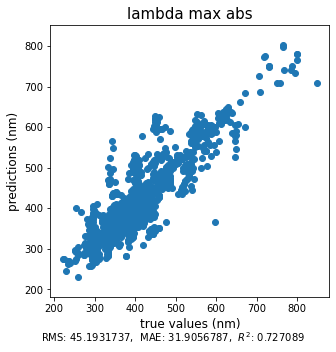

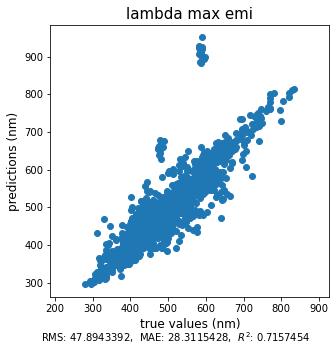

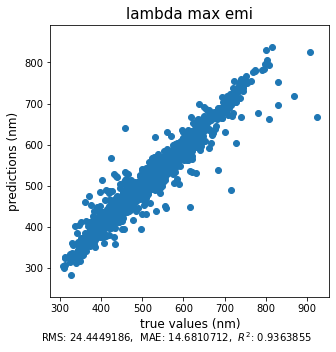

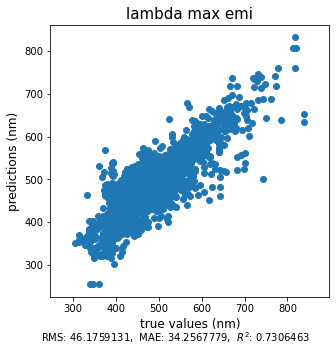

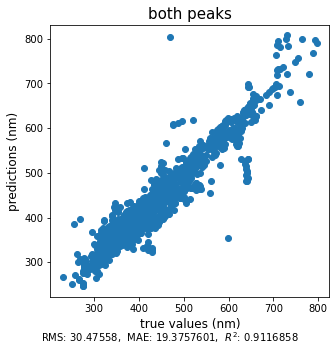

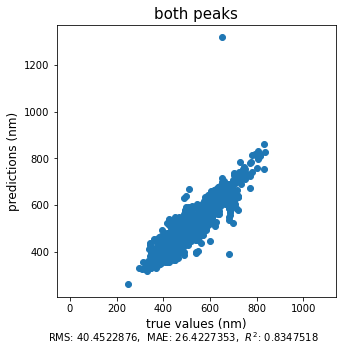

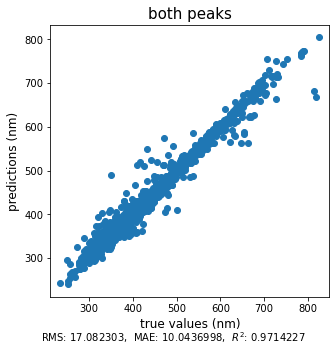

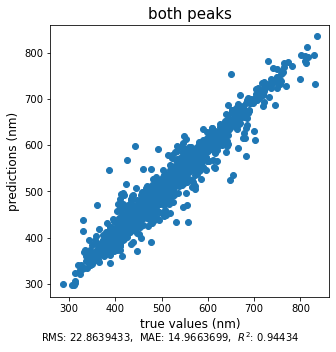

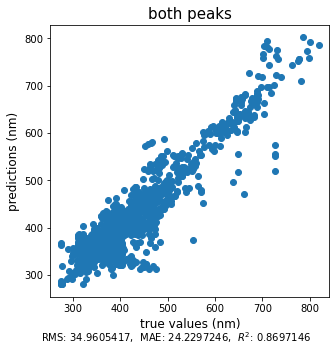

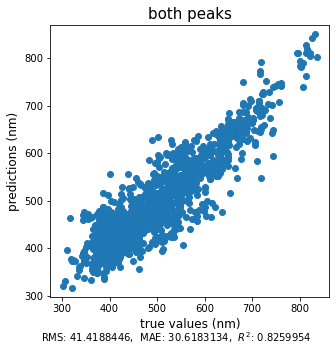

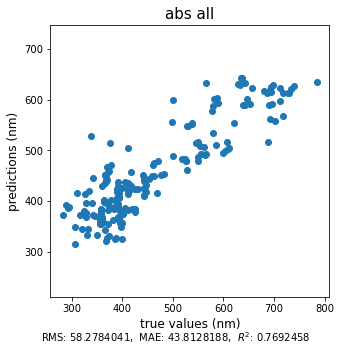

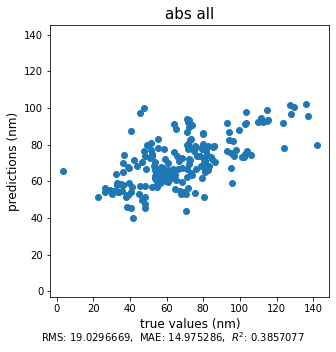

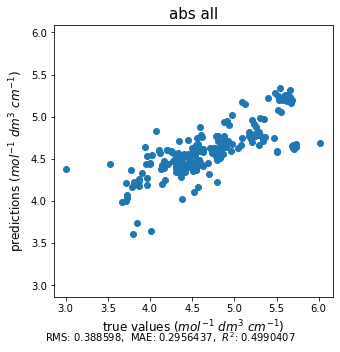

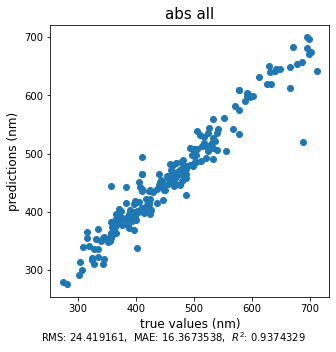

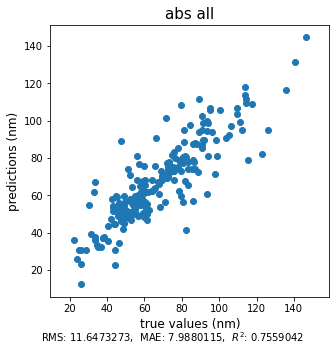

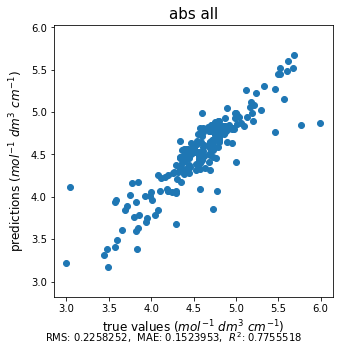

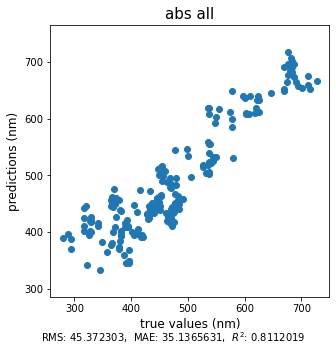

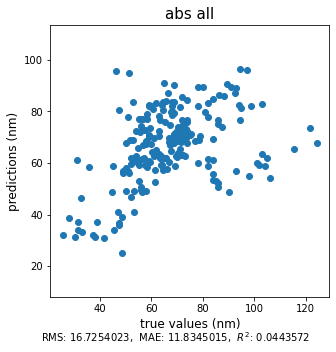

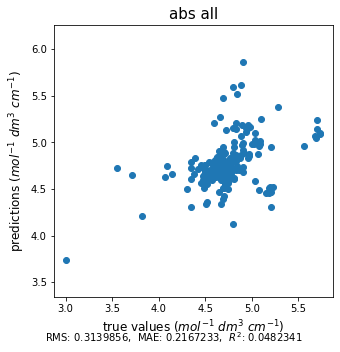

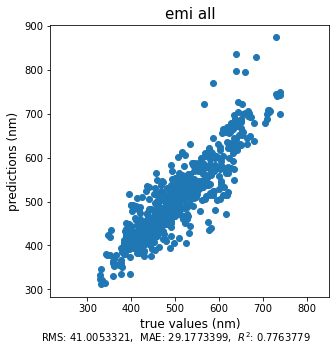

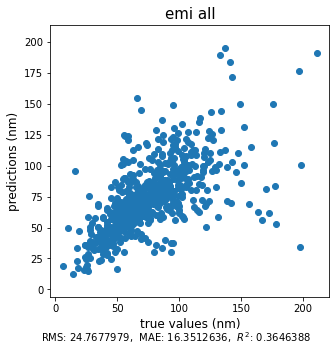

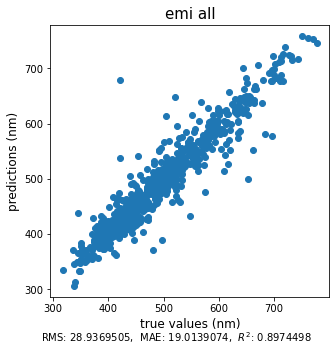

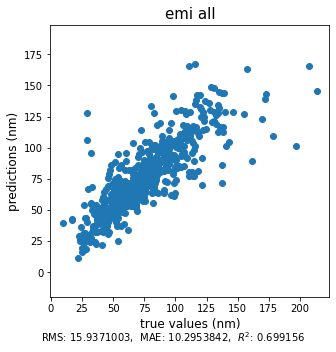

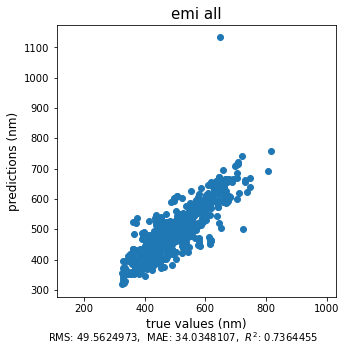

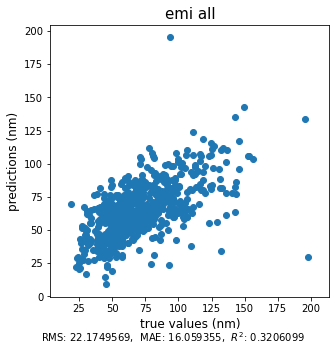

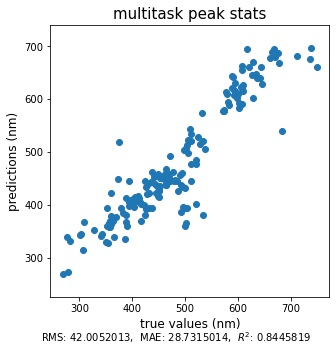

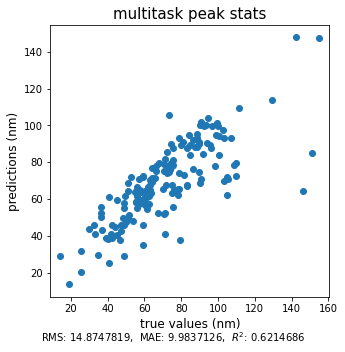

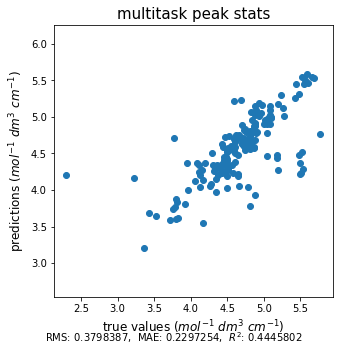

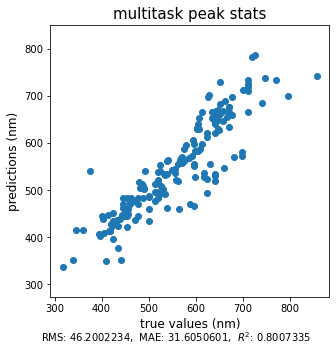

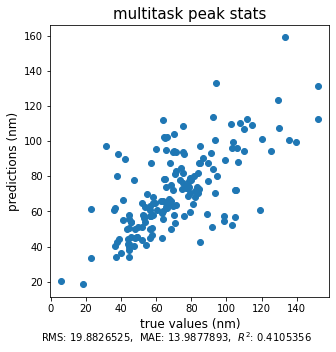

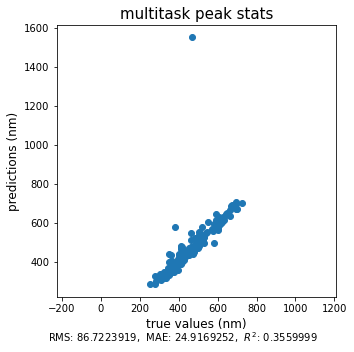

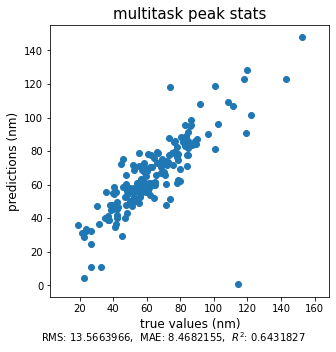

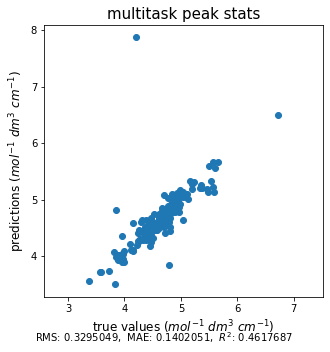

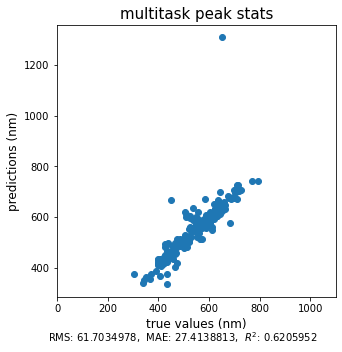

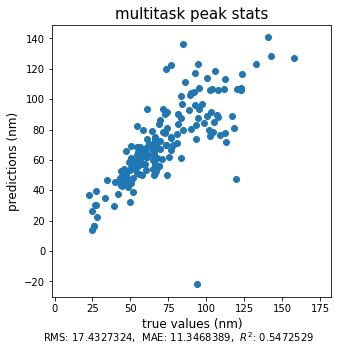

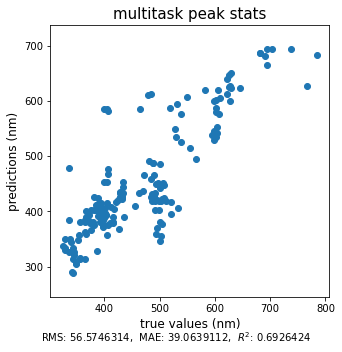

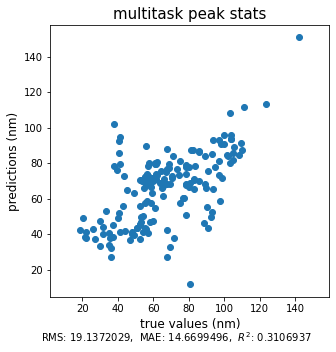

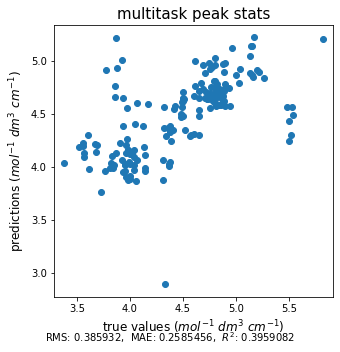

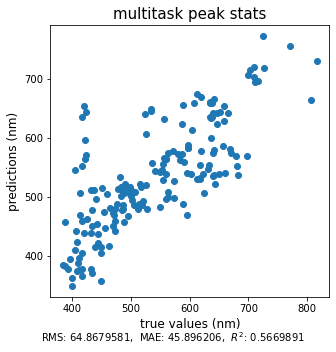

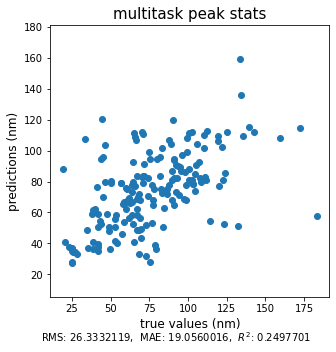

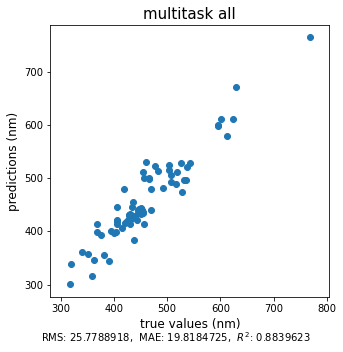

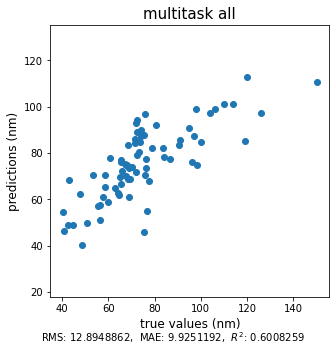

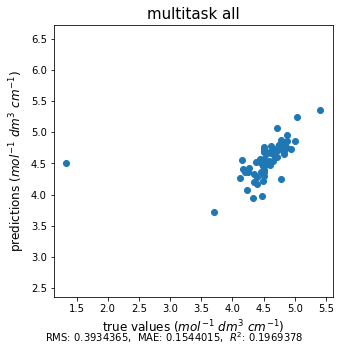

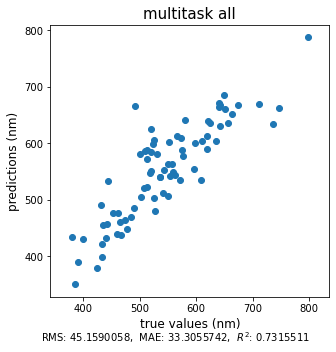

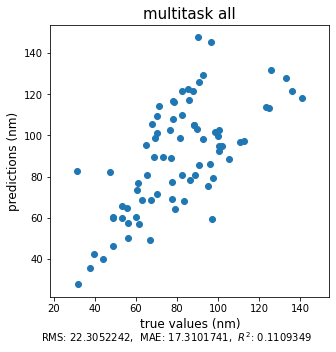

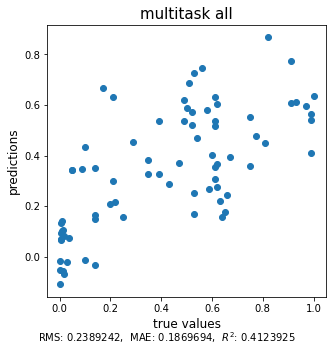

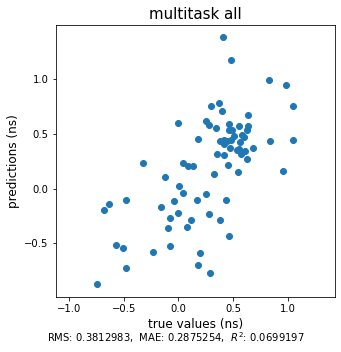

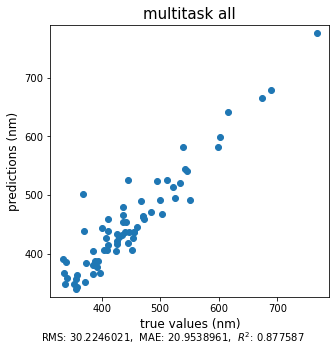

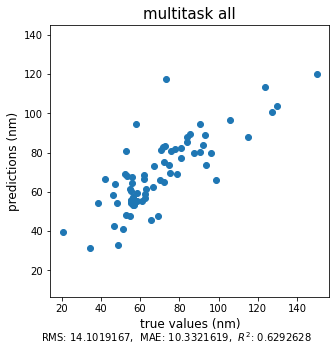

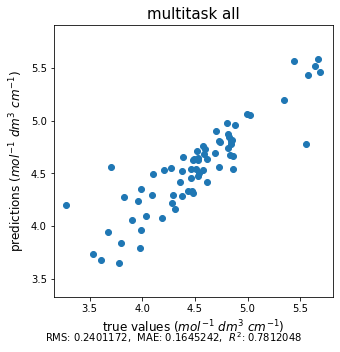

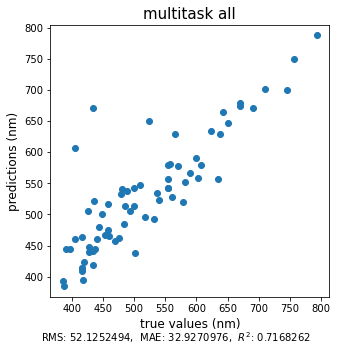

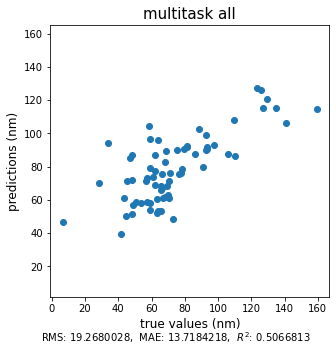

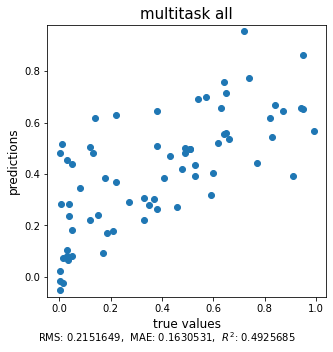

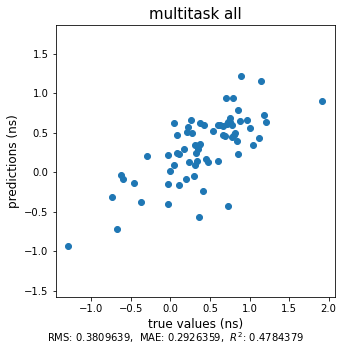

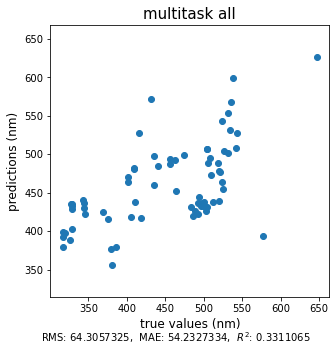

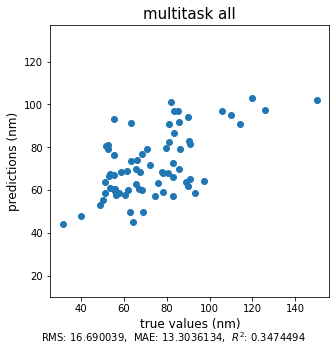

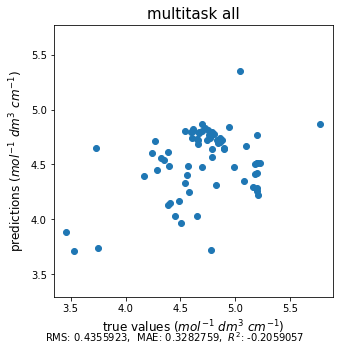

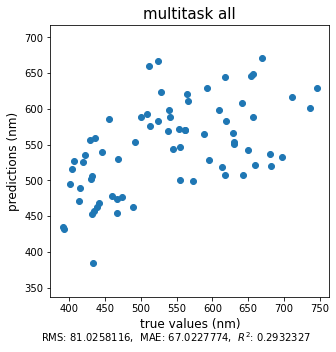

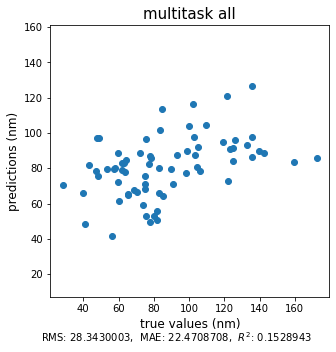

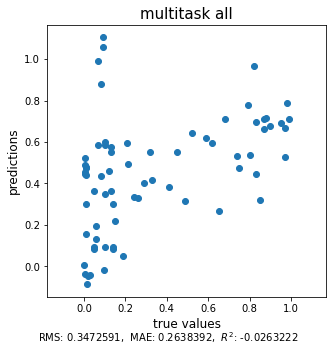

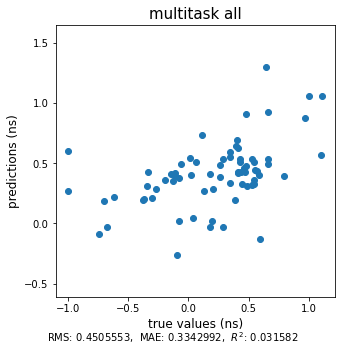

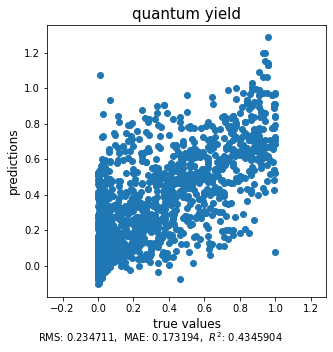

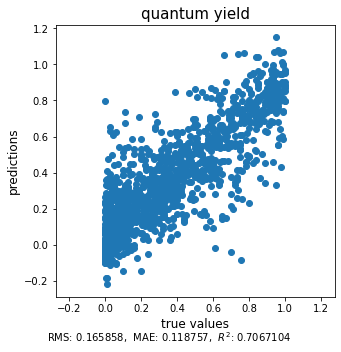

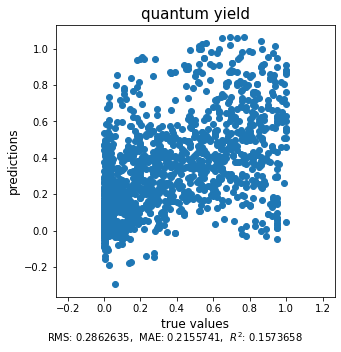

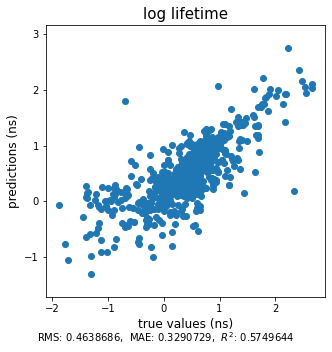

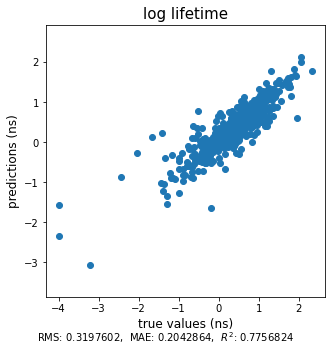

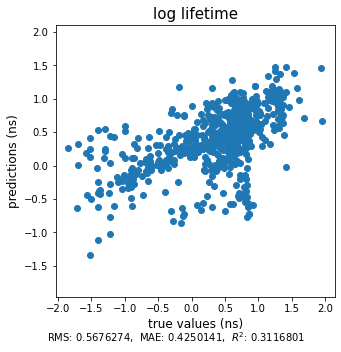

In [95]:
for opt_prop in opt_properties:
    for split_type in split_types:
        preds_file = 'uvvisml/models/'+ opt_prop + '_checkpoints/' + split_type + '/' + opt_prop + '_preds.csv'
        true_file = 'uvvisml/data/splits/'+ opt_prop + '/deep4chem/' + split_type + '/smiles_target_test.csv'
        col_names = prop_to_col_name[opt_prop]
        if isinstance(col_names, list):
            for n in col_names:
                col_name = n
                #title = opt_prop.replace('_', ' ') + ', ' + split_type.replace('_', ' ') + ', ' + col_name.replace('_', ' ')
                title = opt_prop.replace('_', ' ')
                units = col_units[col_name]
                img_name = col_name + '__' + split_type + '__' + my_order[opt_prop] + opt_prop + '.png'
                make_plot(preds_file, true_file, col_name, title, units, img_name)
        else:
            col_name = col_names
            #title = opt_prop.replace('_', ' ') + ', ' + split_type.replace('_', ' ')
            title = opt_prop.replace('_', ' ')
            units = col_units[col_name]
            if col_name == 'peakwavs_max':
                img_name_col_name = 'abs_peakwavs_max'
            else:
                img_name_col_name = col_name
            img_name = img_name_col_name + '__' + split_type + '__' + my_order[opt_prop] + 'alone.png'
            make_plot(preds_file, true_file, col_name, title, units, img_name)

# generate a table of metrics only

In [84]:
# df = pd.DataFrame(list())
# df.to_csv('prediction_metrics.csv')
f = open('prediction_metrics.csv', 'w')
f.write('property_split,rmse,mae,r2\n')

27

In [74]:
def metrics_only(preds_file, true_file, col_name):
    preds_df = pd.read_csv(preds_file)
    true_df = pd.read_csv(true_file)

    true_value = true_df[col_name]
    pred_value = preds_df[col_name]
    
    metrics = calc_metrics(true_value, pred_value)
    return metrics

In [72]:
def calc_metrics(true_value, predicted_value):
    rms = round(mean_squared_error(true_value, predicted_value, squared=False), 7)
    mae = round(mean_absolute_error(true_value, predicted_value), 7)
    r2 = round(r2_score(true_value, predicted_value), 7)
    
    result = str(rms) + ',' + str(mae) + ',' + str(r2) + '\n'
    return result

In [85]:
for opt_prop in opt_properties:
    for split_type in split_types:
        preds_file = 'uvvisml/models/'+ opt_prop + '_checkpoints/' + split_type + '/' + opt_prop + '_preds.csv'
        true_file = 'uvvisml/data/splits/'+ opt_prop + '/deep4chem/' + split_type + '/smiles_target_test.csv'
        col_names = prop_to_col_name[opt_prop]
        if isinstance(col_names, list):
            for n in col_names:
                col_name = n
                img_name = col_name + '__' + split_type + '__' + my_order[opt_prop] + opt_prop + '.png'
                print(img_name)
        else:
            col_name = col_names
            if col_name == 'peakwavs_max':
                img_name_col_name = 'abs_peakwavs_max'
            else:
                img_name_col_name = col_name
            img_name = img_name_col_name + '__' + split_type + '__' + my_order[opt_prop] + 'alone.png'
            print(img_name)

abs_peakwavs_max__group_by_smiles__1alone.png
abs_peakwavs_max__random__1alone.png
abs_peakwavs_max__scaffold__1alone.png
emi_peakwavs_max__group_by_smiles__1alone.png
emi_peakwavs_max__random__1alone.png
emi_peakwavs_max__scaffold__1alone.png
abs_peakwavs_max__group_by_smiles__2both_peaks.png
emi_peakwavs_max__group_by_smiles__2both_peaks.png
abs_peakwavs_max__random__2both_peaks.png
emi_peakwavs_max__random__2both_peaks.png
abs_peakwavs_max__scaffold__2both_peaks.png
emi_peakwavs_max__scaffold__2both_peaks.png
abs_peakwavs_max__group_by_smiles__3abs_all.png
abs_bandwidth__group_by_smiles__3abs_all.png
abs_molar_ext_coeff__group_by_smiles__3abs_all.png
abs_peakwavs_max__random__3abs_all.png
abs_bandwidth__random__3abs_all.png
abs_molar_ext_coeff__random__3abs_all.png
abs_peakwavs_max__scaffold__3abs_all.png
abs_bandwidth__scaffold__3abs_all.png
abs_molar_ext_coeff__scaffold__3abs_all.png
emi_peakwavs_max__group_by_smiles__3emi_all.png
emi_bandwidth__group_by_smiles__3emi_all.png
emi_p

In [98]:
for opt_prop in opt_properties:
    for split_type in split_types:
        preds_file = 'uvvisml/models/'+ opt_prop + '_checkpoints/' + split_type + '/' + opt_prop + '_preds.csv'
        true_file = 'uvvisml/data/splits/'+ opt_prop + '/deep4chem/' + split_type + '/smiles_target_test.csv'
        col_names = prop_to_col_name[opt_prop]
        if isinstance(col_names, list):
            for n in col_names:
                col_name = n
                img_name = col_name + ',' + split_type + ',' + opt_prop + ',' + metrics_only(preds_file, true_file, col_name)
                print(img_name)
        else:
            col_name = col_names
            if col_name == 'peakwavs_max':
                img_name_col_name = 'abs_peakwavs_max'
            else:
                img_name_col_name = col_name
            img_name = img_name_col_name + ',' + split_type + ',' + 'alone' + ',' + metrics_only(preds_file, true_file, col_name)
            print(img_name)

abs_peakwavs_max,group_by_smiles,alone,25.9703207,16.9851155,0.9265451

abs_peakwavs_max,random,alone,19.4497907,10.4677141,0.9669704

abs_peakwavs_max,scaffold,alone,45.1931737,31.9056787,0.727089

emi_peakwavs_max,group_by_smiles,alone,47.8943392,28.3115428,0.7157454

emi_peakwavs_max,random,alone,24.4449186,14.6810712,0.9363855

emi_peakwavs_max,scaffold,alone,46.1759131,34.2567779,0.7306463

abs_peakwavs_max,group_by_smiles,both_peaks,30.47558,19.3757601,0.9116858

emi_peakwavs_max,group_by_smiles,both_peaks,40.4522876,26.4227353,0.8347518

abs_peakwavs_max,random,both_peaks,17.082303,10.0436998,0.9714227

emi_peakwavs_max,random,both_peaks,22.8639433,14.9663699,0.94434

abs_peakwavs_max,scaffold,both_peaks,34.9605417,24.2297246,0.8697146

emi_peakwavs_max,scaffold,both_peaks,41.4188446,30.6183134,0.8259954

abs_peakwavs_max,group_by_smiles,abs_all,58.2784041,43.8128188,0.7692458

abs_bandwidth,group_by_smiles,abs_all,19.0296669,14.975286,0.3857077

abs_molar_ext_coeff,group_by_smi

In [122]:
df = pd.read_csv('prediction_metrics.csv').round({'rmse': 5, 'mae': 5, 'r2': 5})
df

,property,split,combo,rmse,mae,r2
0,abs_peakwavs_max,group_by_smiles,alone,25.97032,16.98512,0.92655
1,abs_peakwavs_max,random,alone,19.44979,10.46771,0.96697
2,abs_peakwavs_max,scaffold,alone,45.19317,31.90568,0.72709
3,emi_peakwavs_max,group_by_smiles,alone,47.89434,28.31154,0.71575
4,emi_peakwavs_max,random,alone,24.44492,14.68107,0.93639
...,...,...,...,...,...,...
64,quantum_yield,random,alone,0.16586,0.11876,0.70671
65,quantum_yield,scaffold,alone,0.28626,0.21557,0.15737
66,log_lifetime,group_by_smiles,alone,0.46387,0.32907,0.57496
67,log_lifetime,random,alone,0.31976,0.20429,0.77568


In [113]:
for index, col in df.iterrows():
    if col['property'] == 'abs_peakwavs_max' and col['split'] == 'group_by_smiles':
        print(str(col['combo']) + ': ' + str(col['rmse']) + '/' + str(col['mae']) + '/' + str(col['r2']))

alone: 25.9703207/16.9851155/0.9265451
both_peaks: 30.47558/19.3757601/0.9116858
abs_all: 58.2784041/43.8128188/0.7692458
multitask_peak_stats: 42.0052013/28.7315014/0.8445819
multitask_all: 25.7788918/19.8184725/0.8839623
